# Sentiment Analysis and Trend Visualization of Women’s Clothing E-Commerce Reviews

## 1. Project Overview

In this project, I analyzed customer reviews from a Women’s Clothing E-Commerce dataset containing 23,486 rows and 10 feature variables before cleaning the data. The dataset provides insights into customer sentiments, with features including product ratings, review text, feedback counts, and age.

### 1.1 Key Objectives

- **Sentiment Analysis:**\
Perform sentiment analysis on the review text to classify sentiments into positive, neutral, and negative categories. This will help in understanding the overall customer perception of the products.

- **Trend Visualization:**\
Use word cloud visualizations to highlight the most frequently used words in positive and negative reviews, revealing key themes and trends in customer feedback.

### 1.2 Methodology

- **Data Cleaning and Preprocessing:**\
Cleaned the review text to remove noise, such as special characters, numbers, and stop words, ensuring text was prepared for accurate analysis.
- **Sentiment Scoring with VADER:**\
Employed the Valence Aware Dictionary and sEntiment Reasoner (VADER) method to score the sentiment of each review. VADER's ability to handle both text polarity and intensity ensured near precise classification of reviews into positive, neutral, and negative sentiments.
- **Visualization:**\
Generated word clouds to visually represent commonly used terms within positive and negative sentiments, providing a clear and engaging view of customer feedback trends.

### 1.3 Outcomes
The analysis provided valuable insights into customer satisfaction and dissatisfaction patterns, aiding the identification of key factors influencing product reviews. These insights can inform targeted marketing strategies, product improvements, and customer service enhancements for the retailer.

This project demonstrates the effective use of sentiment scoring and visualization techniques to extract actionable insights from customer feedback in an e-commerce setting.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')

In [2]:
# import data set

df_reviews = pd.read_csv('C:/Users/jake/Documents/data analytics/projects/ecommerce sentiment analysis/Womens Clothing E-Commerce Reviews.csv')

df_reviews.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


## 2. Data Cleaning

### 2.1 Data Type

In [3]:
df_reviews.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

### 2.2 Drop Features

In [4]:
# drop columns not required
df_reviews.drop(columns=['Clothing ID', 'Division Name', 'Department Name', 'Class Name'], inplace=True)
df_reviews.head(3)

,Unnamed: 0,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0
1,1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4
2,2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0


### 2.3 Missing Data

In [5]:
df_reviews.isnull().sum()

Unnamed: 0                    0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
dtype: int64

In [6]:
df_reviews.shape

(23486, 7)

In [7]:
# Remove rows with nulls for 'Review Text' and reset index

df_reviews.dropna(subset=['Review Text'], inplace=True)
df_reviews.reset_index(drop=True, inplace=True)

In [8]:
# Replace nulls in 'Title'

df_reviews['Title'].fillna('Not Specified', inplace=True)

df_reviews['Title'].isnull().sum()

In [10]:
df_reviews.shape

(22641, 7)

In [11]:
df_reviews.head(3)

,Unnamed: 0,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,33,Not Specified,Absolutely wonderful - silky and sexy and comf...,4,1,0
1,1,34,Not Specified,Love this dress! it's sooo pretty. i happene...,5,1,4
2,2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0


### 2.4 Duplicate Entries

In [12]:
df_reviews.duplicated().sum()

0

### 2.5 Data Structure

In [13]:
# rename 'Unnamed' column to 'Id' and reassign values
df_reviews.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
df_reviews['Id'] = df_reviews.index

df_reviews.head(3)

,Id,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,33,Not Specified,Absolutely wonderful - silky and sexy and comf...,4,1,0
1,1,34,Not Specified,Love this dress! it's sooo pretty. i happene...,5,1,4
2,2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0


### 2.6 Data Validation

In [14]:
print(f"Minimum Age: {df_reviews['Age'].min()}")
print(f"Maximum Age: {df_reviews['Age'].max()}")
print()
print(f"Minimum Positive Feedback Count: {df_reviews['Positive Feedback Count'].min()}")
print(f"Maximum Positive Feedback Count: {df_reviews['Positive Feedback Count'].max()}")

Minimum Age: 18
Maximum Age: 99

Minimum Positive Feedback Count: 0
Maximum Positive Feedback Count: 122


In [15]:
print(sorted(df_reviews['Rating'].unique()))
print(sorted(df_reviews['Recommended IND'].unique()))

[1, 2, 3, 4, 5]
[0, 1]


All numerical values are within acceptable ranges.

## 3. Data Exploration

###  3.1 Rating Distribution

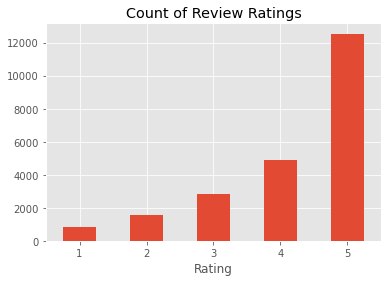

In [85]:
ax = df_reviews['Rating'].value_counts().sort_index().plot(kind='bar', title='Count of Review Ratings', figsize=(6, 4))
ax.set_xlabel('Rating')

# Adjust x-axis labels to stand upright
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Save plot as a PNG image
# plt.savefig('count of review ratings.png', dpi=300, bbox_inches='tight')

plt.show()


### 3.2 Rating Distribution by Age

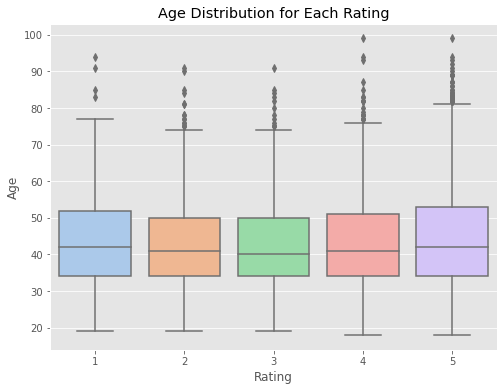

In [17]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_reviews, x='Rating', y='Age', palette='pastel')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Age')
plt.title('Age Distribution for Each Rating')

plt.show()


There appears to be **no bias** in Rating(1-5) by Age. All ratings had median ages around 40 with outliers above 70.

## 4. Sentiment Analysis (VADER Sentiment Analyzer)

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
1. Stop words are removed
2. each word is scored and combined to a total score.

In [18]:
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [19]:
# Run the polarity score on the entire dataset
polarity_scores = {}
for i, row in tqdm(df_reviews.iterrows(), total=len(df_reviews)):
    text = row['Review Text']
    myid = row['Id']
    polarity_scores[myid] = sia.polarity_scores(text)

  0%|          | 0/22641 [00:00<?, ?it/s]

In [20]:
df_polarity = pd.DataFrame(polarity_scores).T

In [21]:
df_polarity.head()

,neg,neu,pos,compound
0,0.000,0.272,0.728,0.8932
1,0.000,0.664,0.336,0.9729
2,0.027,0.792,0.181,0.9427
3,0.226,0.340,0.434,0.5727
4,0.000,0.700,0.300,0.9291


In [22]:
df_polarity = df_polarity.reset_index().rename(columns={'index': 'Id'})

In [23]:
df_polarity.head()

,Id,neg,neu,pos,compound
0,0,0.000,0.272,0.728,0.8932
1,1,0.000,0.664,0.336,0.9729
2,2,0.027,0.792,0.181,0.9427
3,3,0.226,0.340,0.434,0.5727
4,4,0.000,0.700,0.300,0.9291


In [24]:
df_sentiments = df_polarity.merge(df_reviews, how='left')

In [25]:
# sentiment score and metadata
df_sentiments.head()

,Id,neg,neu,pos,compound,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,0.000,0.272,0.728,0.8932,33,Not Specified,Absolutely wonderful - silky and sexy and comf...,4,1,0
1,1,0.000,0.664,0.336,0.9729,34,Not Specified,Love this dress! it's sooo pretty. i happene...,5,1,4
2,2,0.027,0.792,0.181,0.9427,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0
3,3,0.226,0.340,0.434,0.5727,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0
4,4,0.000,0.700,0.300,0.9291,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6


In [26]:
df_sentiments['compound'].unique()

array([ 0.8932,  0.9729,  0.9427, ..., -0.3553, -0.7468, -0.7348])

## 5. Sentiment Visualization (Doughnut Chart)

In [27]:
# Categorize 'compound' in df_sentiment DataFrame into negative, positive, and neutral in a new column 'sentiment'

def get_sentiment(compound):
    if compound <= -0.05:
        return 'negative'
    elif compound >= 0.05:
        return 'positive'
    else:
        return 'neutral'

df_sentiments['sentiment'] = df_polarity['compound'].apply(get_sentiment)


In [28]:
df_sentiments.head()

,Id,neg,neu,pos,compound,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,sentiment
0,0,0.000,0.272,0.728,0.8932,33,Not Specified,Absolutely wonderful - silky and sexy and comf...,4,1,0,positive
1,1,0.000,0.664,0.336,0.9729,34,Not Specified,Love this dress! it's sooo pretty. i happene...,5,1,4,positive
2,2,0.027,0.792,0.181,0.9427,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,positive
3,3,0.226,0.340,0.434,0.5727,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,positive
4,4,0.000,0.700,0.300,0.9291,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,positive


In [29]:
#Create new data frames for all sentiments (positive, negative and neutral)

df_negative = df_sentiments[df_sentiments["sentiment"]=="negative"]
df_positive = df_sentiments[df_sentiments["sentiment"]=="positive"]
df_neutral = df_sentiments[df_sentiments["sentiment"]=="neutral"]

In [30]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [31]:
#Count_values for sentiment
count_values_in_column(df_sentiments,"sentiment")

,Total,Percentage
positive,20987,92.69
negative,1376,6.08
neutral,278,1.23


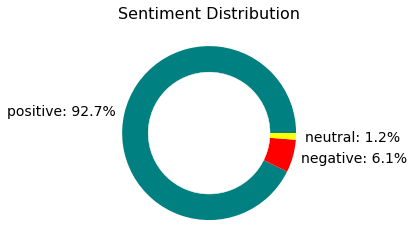

In [80]:
# create data for Pie Chart
pichart = count_values_in_column(df_sentiments,"sentiment")

names = pichart.index
size = pichart["Percentage"]

# Create a circle for the center of the plot to make it a donut chart
my_circle = plt.Circle((0, 0), 0.7, color='white')

# Plot the donut chart with increased label size
plt.pie(
    size,
    labels=[f'{label}: {percentage:.1f}%' for label, percentage in zip(names, size)],
    colors=['teal', 'red', 'yellow'],
    labeldistance=1.1,  # Position of labels further from the center
    textprops={'fontsize': 14}  # Increase font size of the labels
)

# Add the white circle at the center
p = plt.gcf()
p.gca().add_artist(my_circle)

# Add title
plt.title("Sentiment Distribution", fontsize=16)  # Optional: increase title size

# Save plot as a PNG image
# plt.savefig('sentiment distribution.png', dpi=300, bbox_inches='tight')

plt.show()


### Insights:
- The data shows strong positive sentiment, indicating high satisfaction.
- Negative sentiment is minimal but should be reviewed for improvement.
- Neutral sentiment is very low, suggesting polarized engagement overall.

### Action Points:
- Focus on sustaining positivity.
- Address key drivers of negative feedback.

## 6. Sentiment Bias Visualization

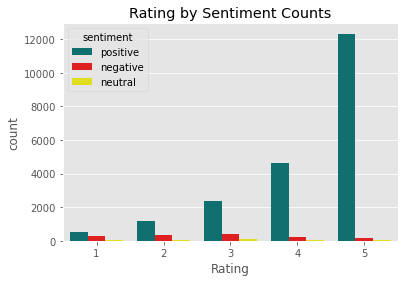

In [33]:
# Define custom colour palette
palette = {
    'positive': 'teal',
    'negative': 'red',
    'neutral': 'yellow'
}

# Create count plot with the custom palette
sns.countplot(data=df_sentiments, x='Rating', hue='sentiment', palette=palette)
plt.title('Rating by Sentiment Counts')

# Display plot
plt.show()

- From the analysis, it can be seen that positive sentiments were spread for all the ratings.
- Contrary to the above, it is most likely for a rating less than 3 to have mainly negative sentiments.
- The 'Review Text' comments were reviewed for both postively and negatively classified sentiments and it was seen that for ratings less than 3, some comments were negative but the vader analyzer classified them as positive.
- On the flip side, some postive comments with Ratings of 4 or 5 were classified as negative.

It's most unlikely to get a perfect analyzer.

However, observing the trends in the 'Compound Score by Customers Rating Review' visual and the corresponding Positive, Neutral, and Negative distributions against Ratings displayed below, prove our VADER Analyzer still useful, even though, the shortcomings.

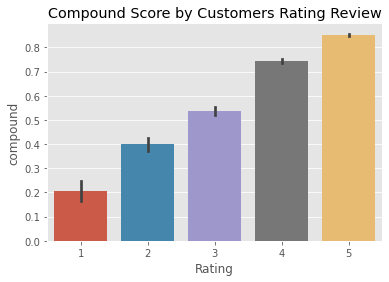

In [37]:
ax = sns.barplot(data=df_sentiments, x='Rating', y='compound')
ax.set_title('Compound Score by Customers Rating Review')
plt.show()

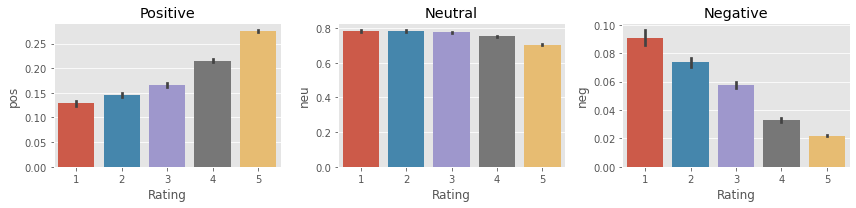

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df_sentiments, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=df_sentiments, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=df_sentiments, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

#### Codes to verify 'Review Text' of classified positive sentiments with ratings <3 and negative sentiments with ratings >3

In [ ]:
# # Display full text: set max_colwidth setting
# pd.set_option('display.max_colwidth', None)

# # Reset max_colwidth setting
# pd.reset_option('display.max_colwidth')

In [67]:
# # Check for positive sentiments with 'Rating' < 3

# pos_rating_less3 = df_sentiments[(df_sentiments['sentiment']=='positive') & (df_reviews['Rating']<3)]['Review Text']
# pos_rating_less3.head(3)

In [68]:
# # Check for negative sentiments with 'Rating' > 3
# neg_rating_greater4 = df_sentiments[(df_sentiments['sentiment']=='negative') & (df_reviews['Rating']>3)]['Review Text']
# neg_rating_greater4.head(3)

## 7. Word Cloud Visualization
Next, we create WORD CLOUDS to visually represent commonly used terms within positive and negative sentiments, providing a clear and engaging view of customer feedback trends.

In [39]:
df_sentiments.head(3)

,Id,neg,neu,pos,compound,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,sentiment
0,0,0.000,0.272,0.728,0.8932,33,Not Specified,Absolutely wonderful - silky and sexy and comf...,4,1,0,positive
1,1,0.000,0.664,0.336,0.9729,34,Not Specified,Love this dress! it's sooo pretty. i happene...,5,1,4,positive
2,2,0.027,0.792,0.181,0.9427,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,positive


In [40]:
import re

def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

In [41]:
# remove special characters in 'Review Text'
df_sentiments['Cleaned Text'] = df_reviews['Review Text'].apply(remove_special_characters)

# convert 'Review Text' to lower case characters
df_sentiments['Cleaned Text'] = df_sentiments['Cleaned Text'].apply(lambda x: x.lower())

df_sentiments.head(3)

,Id,neg,neu,pos,compound,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,sentiment,Cleaned Text
0,0,0.000,0.272,0.728,0.8932,33,Not Specified,Absolutely wonderful - silky and sexy and comf...,4,1,0,positive,absolutely wonderful silky and sexy and comfo...
1,1,0.000,0.664,0.336,0.9729,34,Not Specified,Love this dress! it's sooo pretty. i happene...,5,1,4,positive,love this dress its sooo pretty i happened t...
2,2,0.027,0.792,0.181,0.9427,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,positive,i had such high hopes for this dress and reall...


In [42]:
nltk.download('punkt_tab') # nltk.download('punkt') - jupyter notebook


from nltk.tokenize import word_tokenize

# tokenize 'Review Text'
df_sentiments['tokenized_text'] = df_sentiments['Cleaned Text'].apply(word_tokenize)

In [43]:
df_sentiments.head(3)

,Id,neg,neu,pos,compound,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,sentiment,Cleaned Text,tokenized_text
0,0,0.000,0.272,0.728,0.8932,33,Not Specified,Absolutely wonderful - silky and sexy and comf...,4,1,0,positive,absolutely wonderful silky and sexy and comfo...,"[absolutely, wonderful, silky, and, sexy, and,..."
1,1,0.000,0.664,0.336,0.9729,34,Not Specified,Love this dress! it's sooo pretty. i happene...,5,1,4,positive,love this dress its sooo pretty i happened t...,"[love, this, dress, its, sooo, pretty, i, happ..."
2,2,0.027,0.792,0.181,0.9427,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,positive,i had such high hopes for this dress and reall...,"[i, had, such, high, hopes, for, this, dress, ..."


In [44]:
nltk.download('wordnet') # nltk.download('wordnet') - jupyter notebook

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df_sentiments['lemmatized_text'] = df_sentiments['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [45]:
df_sentiments.head(3)

,Id,neg,neu,pos,compound,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,sentiment,Cleaned Text,tokenized_text,lemmatized_text
0,0,0.000,0.272,0.728,0.8932,33,Not Specified,Absolutely wonderful - silky and sexy and comf...,4,1,0,positive,absolutely wonderful silky and sexy and comfo...,"[absolutely, wonderful, silky, and, sexy, and,...","[absolutely, wonderful, silky, and, sexy, and,..."
1,1,0.000,0.664,0.336,0.9729,34,Not Specified,Love this dress! it's sooo pretty. i happene...,5,1,4,positive,love this dress its sooo pretty i happened t...,"[love, this, dress, its, sooo, pretty, i, happ...","[love, this, dress, it, sooo, pretty, i, happe..."
2,2,0.027,0.792,0.181,0.9427,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,positive,i had such high hopes for this dress and reall...,"[i, had, such, high, hopes, for, this, dress, ...","[i, had, such, high, hope, for, this, dress, a..."


In [46]:
nltk.download('stopwords')

from nltk.corpus import wordnet, stopwords

stop_words = set(stopwords.words('english'))
df_sentiments['lemmatized_text'] = df_sentiments['lemmatized_text'].apply(lambda x: [word for word in x if word not in stop_words])

In [47]:
df_sentiments.head(3)

,Id,neg,neu,pos,compound,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,sentiment,Cleaned Text,tokenized_text,lemmatized_text
0,0,0.000,0.272,0.728,0.8932,33,Not Specified,Absolutely wonderful - silky and sexy and comf...,4,1,0,positive,absolutely wonderful silky and sexy and comfo...,"[absolutely, wonderful, silky, and, sexy, and,...","[absolutely, wonderful, silky, sexy, comfortable]"
1,1,0.000,0.664,0.336,0.9729,34,Not Specified,Love this dress! it's sooo pretty. i happene...,5,1,4,positive,love this dress its sooo pretty i happened t...,"[love, this, dress, its, sooo, pretty, i, happ...","[love, dress, sooo, pretty, happened, find, st..."
2,2,0.027,0.792,0.181,0.9427,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,positive,i had such high hopes for this dress and reall...,"[i, had, such, high, hopes, for, this, dress, ...","[high, hope, dress, really, wanted, work, init..."


### 7.1 Negative Sentiments Word Cloud

In [55]:
negative_words = ' '.join(' '.join(words) for words in df_negative['lemmatized_text'])

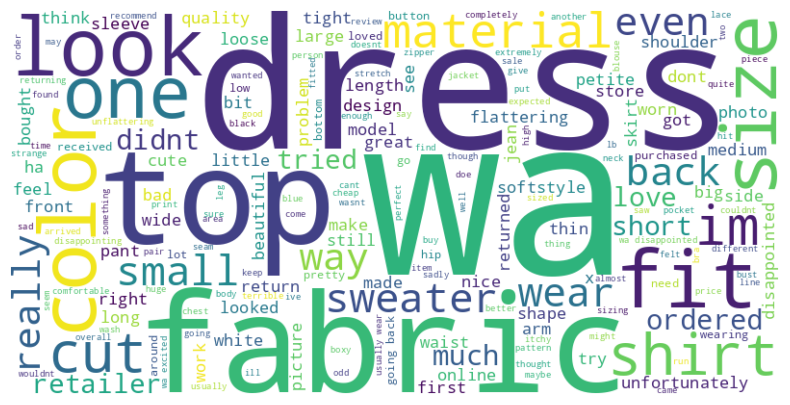

In [57]:
neg_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(negative_words)

plt.figure(figsize=(10,5))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off') # No axis for the word cloud visual
plt.show()

### 7.2 Positive Sentiments Word Cloud

In [58]:
positive_words = ' '.join(' '.join(words) for words in df_positive['lemmatized_text'])

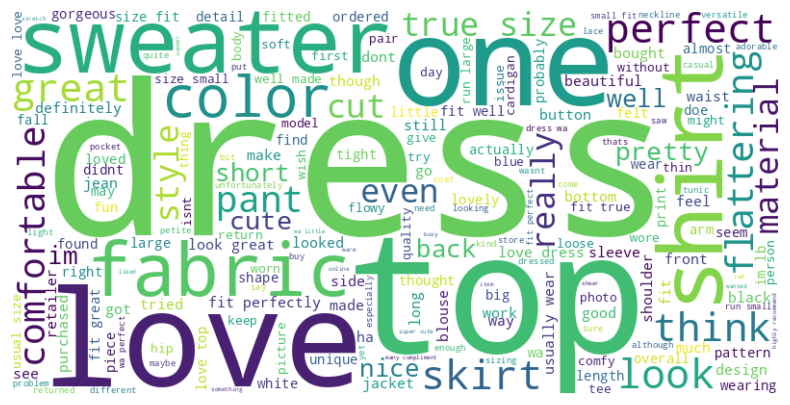

In [59]:
pos_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(positive_words)

plt.figure(figsize=(10,5))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off') # No axis for the word cloud visual
plt.show()

### 7.3 Negative Words Review

In [54]:
# Function to filter reviews by words to get the context of specific words

import pandas as pd
import re

def filter_reviews_by_words(dataframe, column_name, words):
    """
    Filters rows from the specified column of a DataFrame that contain any of the specified words.
    
    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to search.
        words (list): A list of words to look for in the text.
    
    Returns:
        pd.DataFrame: A filtered DataFrame with rows containing the specified words.
    """
    # Compile a regex pattern for the words
    pattern = r'\b(' + '|'.join(re.escape(word) for word in words) + r')\b'
    
    # Filter rows based on the regex match
    filtered_df = dataframe[dataframe[column_name].str.contains(pattern, case=False, na=False)]
    return filtered_df[column_name] #### mpodified to return only the column in question ######


In [74]:
# Specify the column and words to search for
column_to_search = 'Review Text'
words_to_search = ['fit', 'size', 'small', 'short', 'tight', 'large', 'length', 'loose']

# Filter rows
negative_filtered_reviews = filter_reviews_by_words(df_negative, column_to_search, words_to_search)

# Display the filtered reviews
print(negative_filtered_reviews)


In [76]:
# Specify the column and words to search for
column_to_search = 'Review Text'
words_to_search = ['fabric', 'material', 'feel', 'softstyle']

# Filter rows
negative_filtered_reviews = filter_reviews_by_words(df_negative, column_to_search, words_to_search)

# Display the filtered reviews
print(negative_filtered_reviews)


### Negative Review Insights:

1. Fit and Comfort Issues:
    - Some customers reported issues with the fit, such as armholes cutting into the armpits or skirts sitting awkwardly, making them appear wider.
    - Tightness in specific areas (e.g., chest) due to non-stretch fabric has also been highlighted.


2. Fabric Quality Concerns:
    - Multiple reviews expressed dissatisfaction with the quality of fabric, describing it as elastic, heavy, or not matching expectations based on product images.
    - The rayon fabric, in particular, was mentioned as prone to wrinkling and lacking durability, especially considering the price point.


3. Design and Appearance:
    - Positive feedback on design elements like color combinations, embroidery, and overall patterns was noted.
    - However, discrepancies between the actual product and online images (e.g., darker colors, bulkier appearance) led to customer dissatisfaction.


### Action Points:

- Provide detailed descriptions and high-quality images to accurately set customer expectations regarding color, fabric, and fit.
- Consider fabric upgrades or diversification for better customer satisfaction, focusing on stretch and comfort for key areas.
- Offer a sizing guide with clear measurements and recommendations for different body types.


In [56]:
# Display full text: set max_colwidth setting
pd.set_option('display.max_colwidth', None)

# # Reset max_colwidth setting
# pd.reset_option('display.max_colwidth')

### 7.4 Positive Words Review

In [78]:
# Specify the column and words to search for
column_to_search = 'Review Text'
words_to_search = ['love', 'comfortable', 'nice', 'cute', 'fit perfectly']

# Filter rows
positive_filtered_reviews = filter_reviews_by_words(df_negative, column_to_search, words_to_search)

# Display the filtered reviews
print(positive_filtered_reviews)


### Positive Review Insights:

1. Versatility and Design Appeal:
    - Customers appreciate the stylish designs, versatile color combinations, and ability to pair items with different outfits (e.g., tops that match skirts and pants, or dresses that work for parties and work settings).
    - Items with unique design elements, such as shimmer or tulle details, are highly praised for their aesthetic appeal.


2. Fit and Sizing Challenges:
    - Fit issues are commonly noted, including items being too large, too loose, or lacking petite and extra-small size options.
    - Customers often need to compromise on sizing due to limited availability in specific sizes or cuts.


3. Fabric and Quality Feedback:
    - Positive remarks highlight lightweight, soft, and high-quality materials that are comfortable to wear.
    - However, certain products are occasionally described as less supportive or not flattering due to design or fabric limitations.


### Action Points:
- Expand size range offerings to include petite and extra-small options while improving consistency in fit.
- Continue offering unique and versatile designs while ensuring product images and descriptions accurately represent the item.
- Focus on maintaining high fabric quality with added emphasis on comfort and support.